In [1]:
import json 
import requests
import re
import urllib.request
from bs4 import BeautifulSoup
from collections import deque
from html.parser import HTMLParser
from urllib.parse import urlparse
import os
import pandas as pd
import tiktoken
import openai
import numpy as np
from openai.embeddings_utils import distances_from_embeddings, cosine_similarity
from urllib.request import Request, urlopen
from urllib.error import HTTPError




In [12]:
%env openAIkey

UsageError: Environment does not have key: openAIkey


In [13]:
openai.api_key= %env openAIkey

UsageError: Environment does not have key: openAIkey


In [2]:
openai.api_key= #API KEYS GOES HERE 

In [15]:

# Regex pattern to match a URL
HTTP_URL_PATTERN = r'^http[s]*://.+'

# Define root domain to crawl
domain = "infive.ae"
full_url = "https://infive.ae/"
# domain = "openai.com"
# full_url = "https://openai.com/"

In [16]:

# Create a class to parse the HTML and get the hyperlinks
class HyperlinkParser(HTMLParser):
    def __init__(self):
        super().__init__()
        # Create a list to store the hyperlinks
        self.hyperlinks = []

    # Override the HTMLParser's handle_starttag method to get the hyperlinks
    def handle_starttag(self, tag, attrs):
        attrs = dict(attrs)

        # If the tag is an anchor tag and it has an href attribute, add the href attribute to the list of hyperlinks
        if tag == "a" and "href" in attrs:
            self.hyperlinks.append(attrs["href"])


In [17]:

# Function to get the hyperlinks from a URL
def get_hyperlinks(url):
    
    # Try to open the URL and read the HTML
    try:
        # Open the URL and read the HTML
        with urllib.request.urlopen(url) as response:

            # If the response is not HTML, return an empty list
            if not response.info().get('Content-Type').startswith("text/html"):
                return []
            
            # Decode the HTML
            html = response.read().decode('utf-8')
    except Exception as e:
        print(e)
        return []

    # Create the HTML Parser and then Parse the HTML to get hyperlinks
    parser = HyperlinkParser()
    parser.feed(html)

    return parser.hyperlinks

In [18]:

# Function to get the hyperlinks from a URL that are within the same domain
def get_domain_hyperlinks(local_domain, url):
    clean_links = []
    for link in set(get_hyperlinks(url)):
        clean_link = None

        # If the link is a URL, check if it is within the same domain
        if re.search(HTTP_URL_PATTERN, link):
            # Parse the URL and check if the domain is the same
            url_obj = urlparse(link)
            if url_obj.netloc == local_domain:
                clean_link = link

        # If the link is not a URL, check if it is a relative link
        else:
            if link.startswith("/"):
                link = link[1:]
            elif link.startswith("#") or link.startswith("mailto:"):
                continue
            clean_link = "https://" + local_domain + "/" + link

        if clean_link is not None:
            if clean_link.endswith("/"):
                clean_link = clean_link[:-1]
            clean_links.append(clean_link)

    # Return the list of hyperlinks that are within the same domain
    return list(set(clean_links))


In [19]:
local_domain = urlparse(full_url).netloc

In [20]:
queue = deque([full_url])

In [21]:
seen = set([full_url])

In [22]:
brokenURL=[]

In [23]:
print(brokenURL)

[]


In [24]:
print(queue)

deque(['https://infive.ae/'])


In [25]:
invalidlinkList=['jpg','pdf','png']

In [26]:
print(queue)

deque(['https://infive.ae/'])


In [27]:
count = 0
while queue:
# for i in range(0,30):

        # Get the next URL from the queue
        url = queue.pop()
        print(url) # for debugging and to see the progress

        if url[-3:] not in invalidlinkList:
        
            try:
                q=Request(url)
                r=urlopen(q).read()
                soup=BeautifulSoup(r,"html.parser")
                with open('text/'+local_domain+'/'+url[8:].replace("/", "_").replace("?","_") + ".txt", "w",encoding="utf-8") as f:
                    text=soup.get_text()
                    f.write(text)
            except HTTPError as err:
                if err.code==404:
                    brokenURL.append(url)
            
        
            # with open('text/'+local_domain+'/'+url[8:].replace("/", "_").replace("?","_") + ".txt", "w",encoding="utf-8") as f:
            #     text=soup.get_text()
            #     f.write(text)
        else:
            brokenURL.append(url)
            
        
        for link in get_domain_hyperlinks(local_domain, url):
            if link not in seen:
                queue.append(link)
                seen.add(link)
        
        # # Save text from the url to a <url>.txt file
        # with open( 'text/'+local_domain+'/'+url[8:].replace("/", "_").replace("?","_") + ".txt", "w",encoding="utf-8") as f:
        #     try:
        #         q=Request(url)
        #         r= urlopen(q).read()
        #         soup = BeautifulSoup(r, "html.parser")

        #         # Get the text but remove the tags
        #         text = soup.get_text()

            
        #         print("Count: ",count," : ",text)
        #         count+=1
        #     except HTTPError as err:
        #         if err.code==404:
        #             brokenURL.append(url)
                    
        #     f.write(text)
                    
            # Get the text from the URL using BeautifulSoup
            

            # If the crawler gets to a page that requires JavaScript, it will stop the crawl
        #     if ("You need to enable JavaScript to run this app." in text):
        #         print("Unable to parse page " + url + " due to JavaScript being required")
            
        #     # Otherwise, write the text to the file in the text directory
        #     f.write(text)

        # Get the hyperlinks from the URL and add them to the queue
        # else:
        #     brokenURL.append(url)
        # for link in get_domain_hyperlinks(local_domain, url):
        #     if link not in seen:
        #         queue.append(link)
        #         seen.add(link)

https://infive.ae/
https://infive.ae/product/training-room-at-in5-media
https://infive.ae/startups
https://infive.ae/product/meeting-room-at-in5-design
https://infive.ae/in5-news
https://infive.ae/in5-news/3
https://infive.ae/in5-news/2
https://infive.ae/product/conference-hall-at-in5-tech
https://infive.ae/product/main-production-studio-at-in5-media
https://infive.ae/product/design-prototyping-lab
https://infive.ae/wp-content/uploads/2023/03/in5-Prototyping-Lab-Tools-and-Equipment.pdf
https://infive.ae/product/mini-production-studio-at-in5-media
https://infive.ae/product/outdoor-area-at-in5-design
https://infive.ae/wp-content/uploads/2021/08/IMG_2802-scaled.jpg
https://infive.ae/dashboard/%22https:/www.dubaiapprovals.com/services/dtcm-permit/%22
HTTP Error 404: Not Found
https://infive.ae/wp-content/uploads/2021/08/IN5-D3-PHOTOSHOOT-190219-HR-4-of-55-scaled.jpg
https://infive.ae/wp-content/uploads/2021/08/IMG_2813-scaled.jpg
https://infive.ae/wp-content/uploads/2021/08/IMG_2836-scaled

In [28]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

from selenium.webdriver.common.by import By 

from webdriver_manager.chrome import ChromeDriverManager

from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.action_chains import ActionChains
from selenium.common.exceptions import WebDriverException 
import csv
import re

In [29]:
# selenium 4
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))

driver.get("https://infive.ae/setup/directory")
title = driver.title
driver.implicitly_wait(0.5)

[WDM] - Downloading: 100%|██████████| 6.81M/6.81M [00:00<00:00, 9.49MB/s]


In [30]:
actions = ActionChains(driver)
load_more=driver.find_elements(by=By.CLASS_NAME, value="primaryBtn")

while(len(load_more)>=1):
    driver.implicitly_wait(1)

    actions.move_to_element(load_more[0]).perform()
    try:
        driver.implicitly_wait(1)
        load_more[0].click()
    except WebDriverException:
        print("Element is not clickable ")
        break 
page_source = driver.page_source
url='https://infive.ae/setup/directory'
soup = BeautifulSoup(page_source, "lxml")
with open('text/'+local_domain+'/'+url[8:].replace("/", "_").replace("?","_") + ".txt", "w",encoding="utf-8") as f:
                    text=soup.get_text()
                    f.write(text)

Element is not clickable 


In [31]:

# def crawl(url):
#     # Parse the URL and get the domain
#     local_domain = urlparse(url).netloc

#     # Create a queue to store the URLs to crawl
#     queue = deque([url])

#     # Create a set to store the URLs that have already been seen (no duplicates)
#     seen = set([url])

#     # Create a directory to store the text files
#     if not os.path.exists("text/"):
#             os.mkdir("text/")

#     if not os.path.exists("text/"+local_domain+"/"):
#             os.mkdir("text/" + local_domain + "/")

#     # Create a directory to store the csv files
#     if not os.path.exists("processed"):
#             os.mkdir("processed")

#     # While the queue is not empty, continue crawling
#     while queue:

#         # Get the next URL from the queue
#         url = queue.pop()
#         print(url) # for debugging and to see the progress

#         # Save text from the url to a <url>.txt file
#         with open( 'text/'+local_domain+'/'+url[8:].replace("/", "_").replace("?","_") + ".txt", "w",encoding="utf-8") as f:

#             # Get the text from the URL using BeautifulSoup
#             soup = BeautifulSoup(requests.get(url).text, "html.parser")

#             # Get the text but remove the tags
#             text = soup.get_text()

#             # If the crawler gets to a page that requires JavaScript, it will stop the crawl
#             if ("You need to enable JavaScript to run this app." in text):
#                 print("Unable to parse page " + url + " due to JavaScript being required")
            
#             # Otherwise, write the text to the file in the text directory
#             f.write(text)

#         # Get the hyperlinks from the URL and add them to the queue
#         for link in get_domain_hyperlinks(local_domain, url):
#             if link not in seen:
#                 queue.append(link)
#                 seen.add(link)

In [32]:
# crawl(full_url)

In [33]:

def remove_newlines(serie):
    serie = serie.str.replace('\n', ' ')
    serie = serie.str.replace('\\n', ' ')
    serie = serie.str.replace('  ', ' ')
    serie = serie.str.replace('  ', ' ')
    return serie

In [34]:
texts=[]

# Get all the text files in the text directory
for file in os.listdir("text/" + domain + "/"):

    # Open the file and read the text
    with open("text/" + domain + "/" + file, "r", encoding="UTF-8") as f:
        text = f.read()

        # Omit the first 11 lines and the last 4 lines, then replace -, _, and #update with spaces.
        texts.append((file[:-4].replace('-',' ').replace('_', ' ').replace('#update',''), text))

        # texts.append((file[11:-4].replace('-',' ').replace('_', ' ').replace('#update',''), text))


In [35]:
df = pd.DataFrame(texts, columns = ['fname', 'text'])


In [36]:
df['text'] = df.fname + ". " + remove_newlines(df.text)
df.head()

C:\Users\Harman\AppData\Local\Temp\ipykernel_15692\3204937076.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  serie = serie.str.replace('\\n', ' ')


,fname,text
0,infive.ae,infive.ae. Home - In5 Innovation Centers ...
1,infive.ae,infive.ae . Home - In5 Innovation Centers ...
2,infive.ae about us,infive.ae about us. About us - In5 Innovati...
3,infive.ae all events,infive.ae all events. Events - In5 Innovati...
4,infive.ae atypical,infive.ae atypical. Atypical - In5 Innovati...


In [37]:
df['CharacterCount'] = df['text'].apply(lambda x: len(str(x)))

In [38]:
df

,fname,text,CharacterCount
0,infive.ae,infive.ae. Home - In5 Innovation Centers ...,8292
1,infive.ae,infive.ae . Home - In5 Innovation Centers ...,8293
2,infive.ae about us,infive.ae about us. About us - In5 Innovati...,6308
3,infive.ae all events,infive.ae all events. Events - In5 Innovati...,3437
4,infive.ae atypical,infive.ae atypical. Atypical - In5 Innovati...,3552
...,...,...,...
58,infive.ae setup directory,infive.ae setup directory. DIRECTORY – In5...,167694
59,infive.ae setup login,infive.ae setup login. Login – In5 Innova...,1494
60,infive.ae startups 2,infive.ae startups 2. Startups - In5 Innova...,3054
61,infive.ae startups,infive.ae startups. Startups - In5 Innovati...,3052


In [39]:
from textwrap import wrap
def splitLargeCell(df):
    charLen=0
    charindex=0
    tempFname=''
    newdf=pd.DataFrame(columns=['fname','text'])
    for i in range(0,len(df['CharacterCount'])):
        if df['CharacterCount'][i] > 30000:
            charLen=df['CharacterCount'][i]
            charindex=i
    splitStringList= wrap(df['text'][charindex],30000)
    tempFname=df['fname'][charindex]
    for i in range(0,len(splitStringList)):
        newdf.loc[charindex+i]={'fname':tempFname,'text':splitStringList[i]}    
    df=df.drop([charindex])
    df=pd.concat([df.iloc[:charindex],newdf,df.iloc[charindex:]]).reset_index(drop=True)
    df=df.drop(['CharacterCount'],axis=1)
    return df
    

In [40]:
df=splitLargeCell(df)

In [41]:
df.head(70)

,fname,text
0,infive.ae,infive.ae. Home - In5 Innovation Centers ...
1,infive.ae,infive.ae . Home - In5 Innovation Centers ...
2,infive.ae about us,infive.ae about us. About us - In5 Innovati...
3,infive.ae all events,infive.ae all events. Events - In5 Innovati...
4,infive.ae atypical,infive.ae atypical. Atypical - In5 Innovati...
...,...,...
63,infive.ae setup directory,exclusivity and keep things fresh and exciting...
64,infive.ae setup login,infive.ae setup login. Login – In5 Innova...
65,infive.ae startups 2,infive.ae startups 2. Startups - In5 Innova...
66,infive.ae startups,infive.ae startups. Startups - In5 Innovati...


In [42]:
df.to_csv('processed/scraped.csv')

<AxesSubplot: >

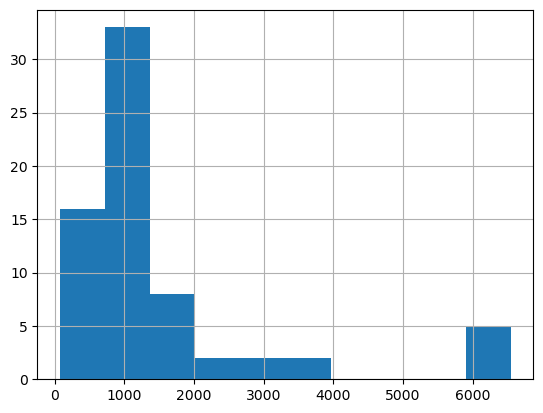

In [43]:
tokenizer = tiktoken.get_encoding("cl100k_base")

df = pd.read_csv('processed/scraped.csv', index_col=0)
df.columns = ['title', 'text']

# Tokenize the text and save the number of tokens to a new column
df['n_tokens'] = df.text.apply(lambda x: len(tokenizer.encode(x)))

# Visualize the distribution of the number of tokens per row using a histogram
df.n_tokens.hist()

In [44]:
max_tokens = 500

In [45]:
def split_into_many(text, max_tokens = max_tokens):

    # Split the text into sentences
    sentences = text.split('. ')

    # Get the number of tokens for each sentence
    n_tokens = [len(tokenizer.encode(" " + sentence)) for sentence in sentences]
    
    chunks = []
    tokens_so_far = 0
    chunk = []

    # Loop through the sentences and tokens joined together in a tuple
    for sentence, token in zip(sentences, n_tokens):

        # If the number of tokens so far plus the number of tokens in the current sentence is greater 
        # than the max number of tokens, then add the chunk to the list of chunks and reset
        # the chunk and tokens so far
        if tokens_so_far + token > max_tokens:
            chunks.append(". ".join(chunk) + ".")
            chunk = []
            tokens_so_far = 0

        # If the number of tokens in the current sentence is greater than the max number of 
        # tokens, go to the next sentence
        if token > max_tokens:
            continue

        # Otherwise, add the sentence to the chunk and add the number of tokens to the total
        chunk.append(sentence)
        tokens_so_far += token + 1
        
    # Add the last chunk to the list of chunks
    if chunk:
        chunks.append(". ".join(chunk) + ".")

    return chunks

In [46]:

shortened = []

# Loop through the dataframe
for row in df.iterrows():

    # If the text is None, go to the next row
    if row[1]['text'] is None:
        continue

    # If the number of tokens is greater than the max number of tokens, split the text into chunks
    if row[1]['n_tokens'] > max_tokens:
        shortened += split_into_many(row[1]['text'])
    
    # Otherwise, add the text to the list of shortened texts
    else:
        shortened.append( row[1]['text'] )

<AxesSubplot: >

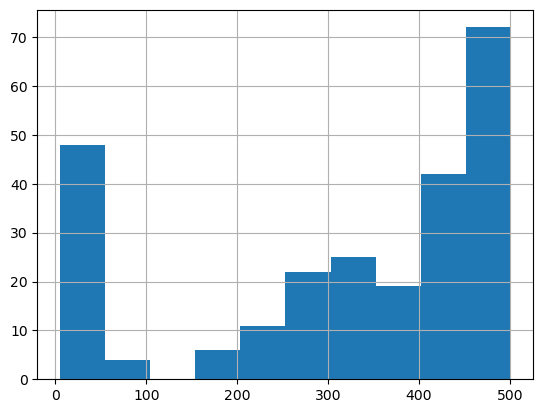

In [47]:
df = pd.DataFrame(shortened, columns = ['text'])
df['n_tokens'] = df.text.apply(lambda x: len(tokenizer.encode(x)))
df.n_tokens.hist()

In [48]:
df['embeddings'] = df.text.apply(lambda x: openai.Embedding.create(input=x, engine='text-embedding-ada-002')['data'][0]['embedding'])
df.to_csv('processed/embeddings.csv')
df.head()

,text,n_tokens,embeddings
0,infive.ae.,5,"[-0.017084967344999313, 0.0019391437526792288,..."
1,Business Setup IndividualMembership Facil...,487,"[-0.004425276070833206, 0.008408726193010807, ..."
2,Sectors icon style Technology Design Media Sec...,296,"[0.009395490400493145, 0.008284864015877247, -..."
3,Learn more upcoming events View All ...,287,"[0.010360229760408401, -0.0065504261292517185,..."
4,infive.ae .,5,"[-0.01570676453411579, 0.001779017737135291, -..."


In [3]:
df=pd.read_csv('processed/embeddings.csv', index_col=0)
df['embeddings'] = df['embeddings'].apply(eval).apply(np.array)

df.head()

,text,n_tokens,embeddings
0,infive.ae.,5,"[-0.017084967344999313, 0.0019391437526792288,..."
1,Business Setup IndividualMembership Facil...,487,"[-0.004425276070833206, 0.008408726193010807, ..."
2,Sectors icon style Technology Design Media Sec...,296,"[0.009395490400493145, 0.008284864015877247, -..."
3,Learn more upcoming events View All ...,287,"[0.010360229760408401, -0.0065504261292517185,..."
4,infive.ae .,5,"[-0.01570676453411579, 0.001779017737135291, -..."


In [4]:

def create_context(
    question, df, max_len=1800, size="ada"
):
    """
    Create a context for a question by finding the most similar context from the dataframe
    """

    # Get the embeddings for the question
    q_embeddings = openai.Embedding.create(input=question, engine='text-embedding-ada-002')['data'][0]['embedding']

    # Get the distances from the embeddings
    df['distances'] = distances_from_embeddings(q_embeddings, df['embeddings'].values, distance_metric='cosine')


    returns = []
    cur_len = 0

    # Sort by distance and add the text to the context until the context is too long
    for i, row in df.sort_values('distances', ascending=True).iterrows():
        
        # Add the length of the text to the current length
        cur_len += row['n_tokens'] + 4
        
        # If the context is too long, break
        if cur_len > max_len:
            break
        
        # Else add it to the text that is being returned
        returns.append(row["text"])

    # Return the context
    return "\n\n###\n\n".join(returns)


In [5]:

def answer_question(
    df,
    model="text-davinci-003",
    question="Am I allowed to publish model outputs to Twitter, without a human review?",
    max_len=1800,
    size="ada",
    debug=False,
    max_tokens=150,
    stop_sequence=None
):
    """
    Answer a question based on the most similar context from the dataframe texts
    """
    context = create_context(
        question,
        df,
        max_len=max_len,
        size=size,
    )
    # If debug, print the raw model response
    if debug:
        print("Context:\n" + context)
        print("\n\n")

    try:
        # Create a completions using the questin and context
        response = openai.Completion.create(
            prompt=f"Answer the question based on the context below, and if the question can't be answered based on the context, say \"I don't know\"\n\nContext: {context}\n\n---\n\nQuestion: {question}\nAnswer:",
            temperature=0,
            max_tokens=max_tokens,
            top_p=1,
            frequency_penalty=0,
            presence_penalty=0,
            stop=stop_sequence,
            model=model,
        )
        return response["choices"][0]["text"].strip()
    except Exception as e:
        print(e)
        return ""


In [6]:
print(answer_question(df, question="What day is it?", debug=False))

print(answer_question(df, question="What is openAI?"))

I don't know.
I don't know.


In [7]:
print(answer_question(df, question="When was OpenAI started? "))

I don't know.


In [8]:
print(answer_question(df, question="What is infive?"))

infive.ae is an enabling platform for entrepreneurs and startups, fostering innovation and helping new ideas reach the marketplace.


In [9]:
print(answer_question(df, question="What is in5?"))

in5 is an enabling platform for entrepreneurs and startups, fostering innovation and helping new ideas reach the marketplace. It offers a comprehensive portfolio of benefits to entrepreneurs, professionals, corporates and students in the fields of Technology, Media and Design. in5 provides access to cutting-edge and specialised facilities as well as a dynamic and creative environment and sessions that foster the development of innovative ideas.


In [10]:
print(answer_question(df, question="what facilites does infive have?"))

infive.ae has facilities such as meeting rooms, conference halls, board rooms, fashion labs, editing suites, incubation centers, outdoor areas, voice recording studios, multi-functional halls, lounge areas, and main production studios.


In [11]:
print(answer_question(df, question="How many startups are there in infive?"))

More than 750 start-ups are supported by the incubator since its inception.


In [12]:
print(answer_question(df, question="what facilites does in5 have?"))

infive.ae has facilities such as meeting rooms, conference halls, board rooms, fashion labs, editing suites, outdoor areas, training rooms, multi-functional halls, video recording studios, screening rooms, green rooms, production studios, and mini production studios at its tech, media, and design locations.


In [13]:
print(answer_question(df, question="What is the 3NDK Tech?"))

3NDK is the next logistics provider technology, offering a quick solution for an array of customer needs. The application provides a simple and convenient way to order services such as: Pick-up and Delivery Roadside Assistance Vehicle Recovery Moving.


In [14]:
print(answer_question(df, question="What is The Assembly?"))

I don't know.


In [15]:
print(answer_question(df, question="in5 General Membership fees?"))

6-Months Membership Fees AED.1,50012-Months Membership Fees AED.2,500


In [16]:
print(answer_question(df, question="in5 student membership fee?"))

AED 500 annually.


In [17]:
print(answer_question(df, question="price for booking a meeting room in in5?"))

AED.25/Hour for Startups and Investors, AED.200/Hour for Members, and AED.250/Hour for Non-Members.
